<a href="https://colab.research.google.com/github/Z5-05/study_third_sem/blob/main/ml/Mephi_ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install ucimlrepo

In [ ]:
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# hcv_data = fetch_ucirepo(id=571)

# # data (as pandas dataframes)
# X = hcv_data.data.features
# y_base = hcv_data.data.targets

In [ ]:
import re
import requests
import json
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks")

from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
y_base = LabelEncoder().fit_transform(y_base)
X.fillna(0, inplace=True)

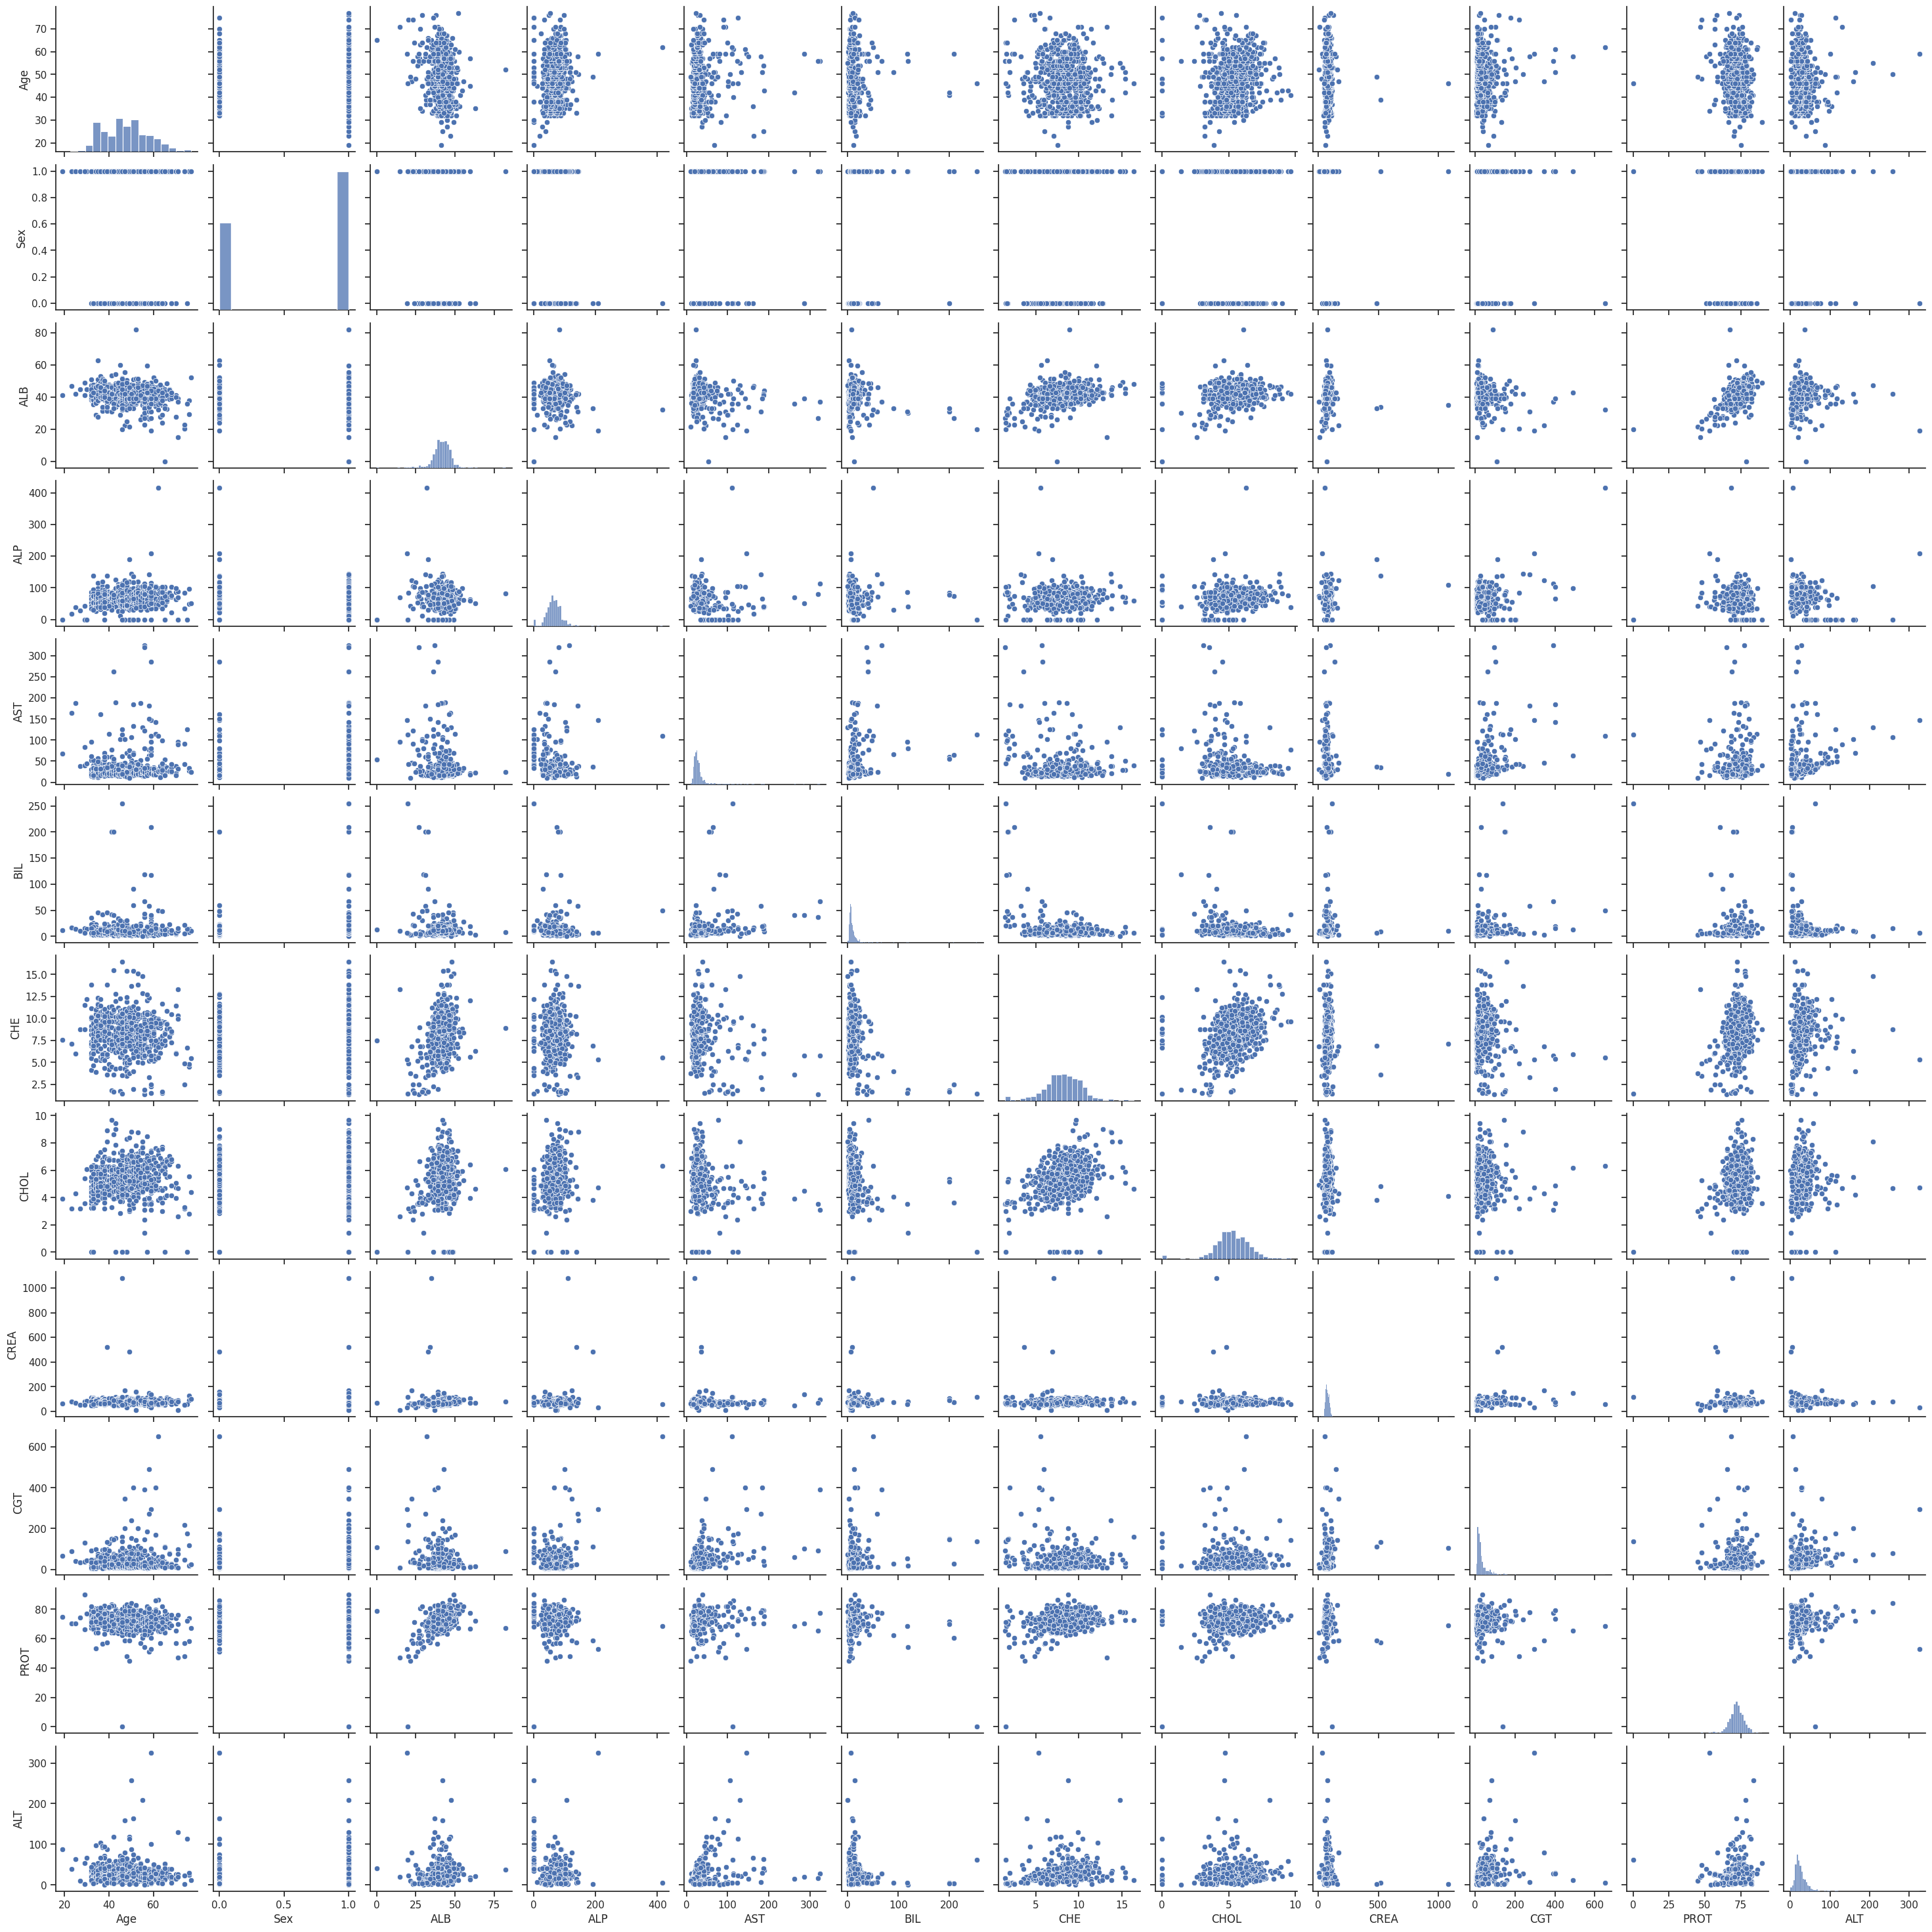

In [84]:
sns.pairplot(X)
plt.show()

In [85]:
for i in range(2, 11):
  y = GaussianMixture(n_components=i, random_state=0).fit_predict(X)
  silhouette = metrics.silhouette_score(X, y, metric='euclidean')
  dbs = metrics.davies_bouldin_score(X, y)
  print(f"Silhouette = {silhouette}, davies_bouldin_score = {dbs}")
# лучше - 4
y = GaussianMixture(n_components=4, random_state=0).fit_predict(X)

Silhouette = 0.8370684606253815, davies_bouldin_score = 1.0318199610293874
Silhouette = 0.8182540391993071, davies_bouldin_score = 0.4678976037252675
Silhouette = 0.8233535097638847, davies_bouldin_score = 0.4573698090651854
Silhouette = 0.4766296413065768, davies_bouldin_score = 0.9918040683511278
Silhouette = 0.2562265692880594, davies_bouldin_score = 1.2959111180883045
Silhouette = 0.25512110266390503, davies_bouldin_score = 1.3267513136501616
Silhouette = 0.11884121867660982, davies_bouldin_score = 1.306135260271522
Silhouette = 0.11864268067417819, davies_bouldin_score = 1.1994791939030807
Silhouette = 0.14157059045996231, davies_bouldin_score = 1.2108271832359299


In [86]:
svd = TruncatedSVD(n_components=2, random_state=42)

X2 = pd.DataFrame(svd.fit_transform(X))

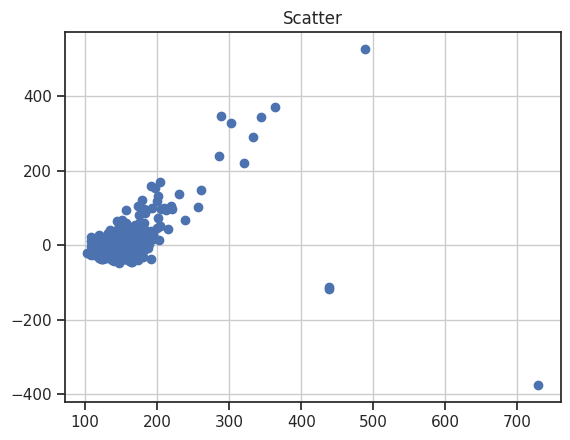

In [87]:
plt.scatter(X2.loc[:, 0], X2.loc[:, 1])
plt.title("Scatter")
plt.grid()
plt.show()

In [88]:
for i in range(2, 11):
  y2 = GaussianMixture(n_components=i, random_state=0).fit_predict(X2)
  silhouette = metrics.silhouette_score(X2, y2, metric='euclidean')
  dbs = metrics.davies_bouldin_score(X2, y2)
  print(f"Silhouette = {silhouette}, davies_bouldin_score = {dbs}")
# лучше - 3
y2 = GaussianMixture(n_components=3, random_state=0).fit_predict(X2)

Silhouette = 0.5907146796672549, davies_bouldin_score = 0.8736758549771084
Silhouette = 0.6331354576152692, davies_bouldin_score = 0.6270138127335073
Silhouette = 0.5488959425019805, davies_bouldin_score = 0.6660456820872096
Silhouette = 0.5415987587617722, davies_bouldin_score = 0.5654572810435917
Silhouette = 0.5359168339627928, davies_bouldin_score = 0.4969645394684005
Silhouette = 0.360970488515073, davies_bouldin_score = 0.5992771010062233
Silhouette = 0.3593302054746366, davies_bouldin_score = 0.5285331111258319
Silhouette = 0.3703885235708512, davies_bouldin_score = 0.5933103831905259
Silhouette = 0.36475244523216255, davies_bouldin_score = 0.6445146669395299


In [89]:
metrics.rand_score(y, y2)

0.7233018193374117